# Intro Python PHYS-311

Now we are going to import some modules that we will use in our notebook, <code> numpy </code>, <code> scipy </code> and <code> matplotlib </code>. We will use an alias for each of the modules.

In [98]:
import numpy as np
import scipy as sp


### Variables

Python doesn't require explicitly declared variable types, like C and other languages do. Just assign a variable and Python understands what you want:

In [99]:
a = 5      # a is an integer 5
b = 'five' # b is a string of the word 'five'
c = 5.0    # c is a floating point 5  

You can ask python to tell you the type of the variable

In [100]:
print(type(a), type(b), type(c))

(<type 'int'>, <type 'str'>, <type 'float'>)


#### Lists

Lists in python are like C arrays except that each element can be of any type.
The syntax for creating lists in Python is [...]:

In [227]:
l = [23, 234, 3.1416, 45, 341, 33, "I am in a list", True]
print type(l)

<type 'list'>


We can use the same slicing techniques to manipulate lists:

In [232]:
print l[1:4] # slides of elements from 1 to 2
print l[-1] #last element
print l[3] # third element
print l[:] #all elements (Same as l)
print l[::2] #elements from 0 to last in steps of 2

[234, 3.1416, 45]
True
45
[23, 234, 3.1416, 45, 341, 33, 'I am in a list', True]
[23, 3.1416, 341, 'I am in a list']


The function <code> range </code> in python is widely use to generate enumeration lists:

In [235]:
print range(2, 10, 2) # range from 2 to 10 in steps of 2. End point is omitted!

[2, 4, 6, 8]


### Functions

A function is a block of organized, reusable code that is used to perform a single, related action. Functions provide better modularity for your application and a high degree of code reusing. As you already know, python gives you many built-in functions like print(), etc. but you can also create your own functions. The syntax for functions is:

```python
def functionname( parameters ):
   """docstring"""
   code
   return something
```

An example is:

In [236]:
def mypower(x, power):
    return x**power

print mypower(4,2)

16


We can create functions with conditions for example:

In [237]:
def myfunction(x):
    if x < -1 or x > 1:
        return 0
    else:
        return 15./4. * (x**2 - x**4)
    
print myfunction(3), myfunction(0.5)

0 0.703125


### The power of Python: Modules

Most of the functionality in Python is provided by *modules*. The Python Standard Library is a large collection of modules that provides *cross-platform* implementations of common facilities such as access to the operating system, file I/O, string management, network communication, and much more.

* Must haves
    * [numpy](www.numpy.org): random numbers, arrays, transcendental functions, linear algebra.
    * `scipy`: statistical tests, special functions, integration, curve fitting, minimization.
    * `matplotlib`: plotting: xy plots, error bars, contour plots, histograms.


### Importing style

There are several ways to load a module for example, in the case of numpy we could do:

**Option 1**:  
```Python 
import numpy
x = numpy.cos(2 * numpy.pi)
```

**Option 2**:  
```Python 
import numpy as np
x = np.cos(2 * np.pi)
```

**Option 3**:  
```Python 
from numpy import cos, pi
x = cos(2 * pi)
```

**Option 4**:  
```Python 
from numpy import *
x = cos(2 * pi)
```

Options **1** and **2** are the preferred one. They allowed you to keep each function related to its function. For example, there is another module `math` with a the function `cos` implemented, by keeping the `np.cos` or `numpy.cos` you avoid confusion between them. Option **3** might be used we need access only to some of the functions inside the module. Option **4** saves a lot of typing but is sloppy and **not recommended**. 


Explicit is better than implicit

### The numpy module

The <code>numpy</code> package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and <code>Fortran</code> so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

The central feature of NumPy is the array object class. Arrays are similar to lists in Python, except that every element of an array must be of the same type, typically a numeric type like float or int. Arrays make operations with large amounts of numeric data very fast and are generally much more efficient than lists. An array can be created from a list by using the array function. You can use the second argument to specify what type of data is in the list or leave it out entirely for numpy to decided what kind of data it is.

In [238]:
a = np.array([1, 4, 5, 8], float) 
print a
print type(a)

[ 1.  4.  5.  8.]
<type 'numpy.ndarray'>


Arrays can be multidimensional. Unlike lists, different axes are accessed using commas inside bracket notation. Here is an example with a two-dimensional array (aka, a matrix)

In [239]:
a = np.array([[1, 2, 3], [4, 5, 6]], float) 
print a
print a[0,0]
print a[0,1]

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
1.0
2.0


Array slicing works with multiple dimensions in the same way as usual, applying each slice specification as a filter to a specified dimension. Use of a single ":" in a dimension indicates the use of everything along that dimension. 


In [240]:
print(a[1,:])
print(a[:,2])
print(a[-1:,-2:])

[ 4.  5.  6.]
[ 3.  6.]
[[ 5.  6.]]


The shape property of an array returns a tuple with the size of each array dimension: 

In [241]:
a.shape

(2, 3)

Functions in <code>numpy</code> are vectorized meaning they can take arrays as arguments:

In [242]:
x = a[0,0] #this is a scaler
print np.power(x,2)
print np.power(a,2)

1.0
[[  1.   4.   9.]
 [ 16.  25.  36.]]


This will not work with our function defined with conditions, example:

In [243]:
x = np.linspace(-1, 1, 50, endpoint=True) # this creates an array between -1, 1 with 50 points
print myfunction(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We can handle better errors by using the function:
```Python
    try:
        statement
    except:
        print("Caught an exception")
```
To get information about the error, we can access the Exception class instance that describes the
exception by using for example:

In [244]:
try:
    myfunction(x)
except Exception as e:
    print("Caught exception: %s"%e)

Caught exception: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


To avoid this error we can *vectorized* our function using the `numpy` function `np.vectorize(function)`:

In [245]:
vmyfunction = np.vectorize(myfunction)

y = vmyfunction(x)

print y

[ 0.          0.27589504  0.4952903   0.66393098  0.78731252  0.87068053
  0.91903086  0.93710954  0.92941283  0.90018719  0.85342929  0.792886
  0.72205441  0.64418182  0.56226572  0.47905383  0.39704406  0.31848454
  0.2453736   0.17945979  0.12224186  0.07496876  0.03863967  0.01400395
  0.0015612   0.0015612   0.01400395  0.03863967  0.07496876  0.12224186
  0.17945979  0.2453736   0.31848454  0.39704406  0.47905383  0.56226572
  0.64418182  0.72205441  0.792886    0.85342929  0.90018719  0.92941283
  0.93710954  0.91903086  0.87068053  0.78731252  0.66393098  0.4952903
  0.27589504  0.        ]


### The matplotlib module

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. The tidy thing to import matplotlib.pyplot matplotlib.pyplot module under the name plt (the tidy way):

In [246]:
#this line tells matplotlib to show the images inline in the notebook instead of openning a new window
%matplotlib inline

import matplotlib.pyplot as plt

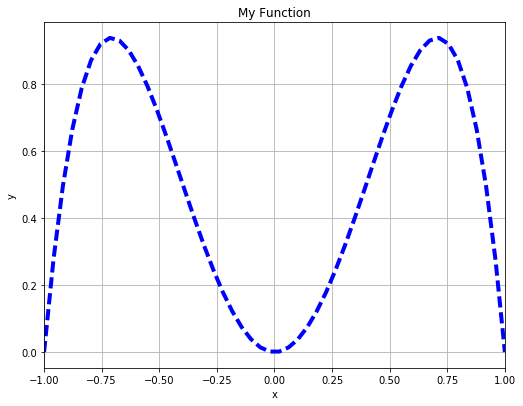

In [247]:
fig = plt.figure(figsize=(8,6))

#fig, ax = plt.subplots(figsize=(8,6)) Another way to generate figure and axes at the same time

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

ax.plot(x, y, 'b--', lw=4)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1,1)
ax.grid()
ax.set_title('My Function');


We can use numpy also to calculate the integral using the trapezoidal method:

In [250]:
dx = np.diff(x)[0] # numpy diff calcualtes the difference of x[i+1] - x[i], it returns an array.
integral = np.trapz(y, dx = dx )
print ("The integral of the function is %.4f"%integral)


The integral of the function is 0.9979


### MonteCarlo simulation using Hit and Miss 

Now we are going to see the simulation of any user-defined function using the MonteCarlo. First we are going to use a method à la C, ie with loops etc. Then we will see the more <code> pythonic </code> way using vectorized functions

In [251]:
mc_events = 10000 #this is the number of randon numbers generated but not the ones we actually use!
ymax = np.max(y) # maximum from the function
print ymax


0.937109537693


In [252]:
data1 = []
for i in range(0, mc_events):
    rnd1 = np.random.rand()
    rnd2 = np.random.rand()
    yrnd = ymax*rnd1 # random number between 0, ymax
    xrnd = 2*rnd2 - 1 # random number between -1, 1
    if yrnd < myfunction(xrnd):
        data1.append(xrnd)
        

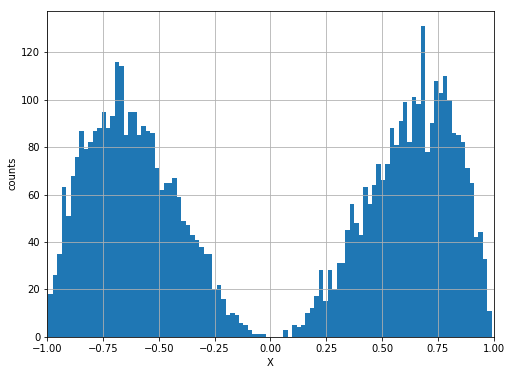

In [253]:
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.grid()
ax1.hist(data1,bins = 100) #plot the data in a histogram with 100 bins
ax1.set_xlabel("X")
ax1.set_ylabel("counts")
ax1.set_xlim(-1,1)
plt.show()

Now with vectorized functions ie, without loops!

In [254]:
rnd1 = np.random.rand(mc_events) #array of mc_events randon numbers!
rnd2 = np.random.rand(mc_events) #array of mc_events randon numbers!
yrnd = ymax*rnd1 # array of mc_events size of y's (0, ymax)
xrnd = 2*rnd2 - 1 # array of mc_events size of x's (-1, 1)
yprime = vmyfunction(xrnd) # array of values of function evaluated at x's

data2 = xrnd[np.where(yrnd < yprime)]

The function ```Python np.where(condition)``` is extremely useful, it returns the indexes, of the array that satisfy the ```condition``` between brackets

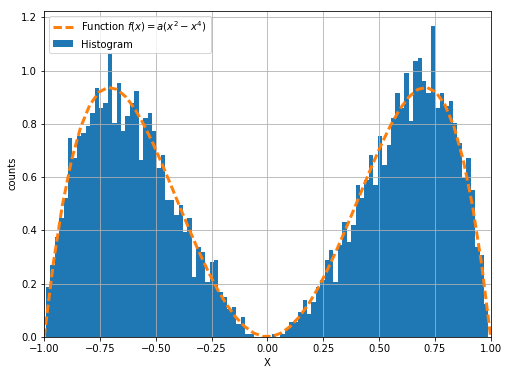

In [262]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
ax2.hist(data2,bins = 100, normed = True, label="Histogram") #plot the data in a histogram with 100 bins
ax2.plot(x, y, '--', lw=3, label="Function $f(x) = a(x^2-x^4)$")
ax2.set_xlabel("X")
ax2.set_ylabel("counts")
ax2.set_xlim(-1,1)
ax2.legend()
plt.show()

### Inverse transformation 


To use this method we need to calculate the integral of our function as function of $x$, ie:


$$g(x) = \frac{1}{\pi \alpha\left(1 + \left(\frac{x - x_0}{\alpha}\right)^2\right)}$$

$$G(x) = \frac{1}{\pi} \arctan \left(\frac{x-x_0}{\alpha}\right) + \frac{1}{2}$$


$$G^{-1}(x) = \alpha \tan \left(\pi \left(x - \frac{1}{2}\right)\right) + x_0 $$

In [288]:
def cauchy(x):
    return 1./(np.pi *(1+ x**2))

def inv_G(x):
    return np.tan(np.pi*(x - 0.5))

x = np.linspace(-4, 4, 100)
y = cauchy(x)


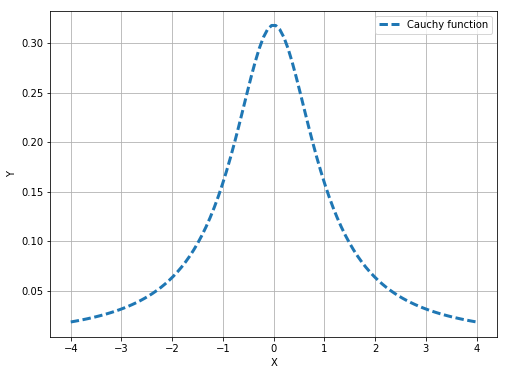

In [289]:
fig3, ax3 = plt.subplots(figsize=(8,6))
plt.grid()
ax3.plot(x, y, '--', lw=3, label="Cauchy function")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.legend()
plt.show()

In [308]:
rnd = np.random.rand(mc_events)
data3 = inv_G(rnd)

print np.min(data3), np.max(data3)

-3664.53277278 2512.47657401


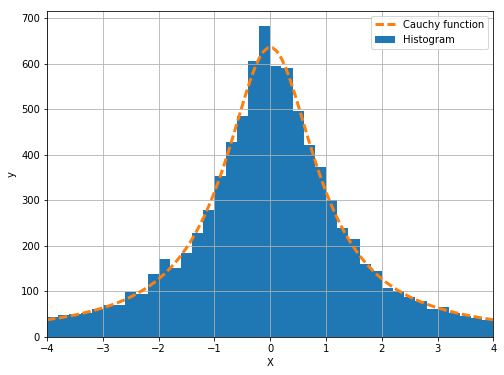

In [307]:
fig4, ax4 = plt.subplots(figsize=(8,6))
plt.grid()
binsedges = np.arange(-4,4.5,0.2) # we dont want to show the whole range from min(data3) to max(data3) only 
binswidth = np.diff(binsedges)[0]

ax4.hist(data3, bins = binsedges, normed = False, label="Histogram") #plot the data in a histogram with 100 bins
ax4.plot(x, y * mc_events * binswidth, '--', lw=3, label="Cauchy function")

# The following does not work, since the normed = True only normalizes the histogram in the visible range!
#ax4.hist(data3, bins = binsedges, normed = True, label="Histogram") #plot the data in a histogram with 100 bins
#ax4.plot(x, y , '--', lw=3, label="Cauchy function")


ax4.set_xlabel("X")
ax4.set_ylabel("y")
ax4.set_xlim(-4,4)
ax4.legend()
plt.show()